In [26]:
import numpy as np
from fourier import compute_fourier_coeff
from signal_functions import truncated_sine_series, truncated_fourier_series
from kernels import complex_exponential_kernel, dirichlet_kernel_shifted
from inference_utils import  run_inference_error_time_localized, run_inference_error_frequency_localized
from plotting import plot_error_with_std

In [27]:
#set random seed for reproducibility
seed = 42

num_samples = 24   # number of samples
num_experiments = 5 # number of experiments when computing the error


#time grid 
grid_size = 2**12 # number of grid points

t_left = 0
t_right = 1

time_span = t_right - t_left

time_array = np.linspace(t_left,t_right,grid_size)

In [28]:
#parameter for target signal
target_decay_rate = 1.1 # decay rate of the target signal
noise = .02 # noise level


In [29]:
# Ground truth function and observation  noise         
# y_i = x_i * target + noise, where x_i is the input signal

sum_terms_target = 30  # index  of truncation of the fourier series
target = truncated_sine_series(
    input_points=time_array, decay_rate=target_decay_rate, num_terms=sum_terms_target
)

##fourier coefficients of w_true
target_fourier_coeff = compute_fourier_coeff(
    target, time_span
)  # normalized by the number of grid points


# for freq-loc inputs
max_sum_freq_signals = sum_terms_target

In [30]:
# the kernel


# complex exponential for kernel
# kernel_decay_rate =  1.01 # decay rate of the kernel

# if kernel_decay_rate <=1 or target_decay_rate<=1:
#     raise ValueError("kernel_decay_rate and target_decay_rate must be > 1")


#complex exponential kernel
# sum_terms_kernel = sum_terms_target
# evaluated_kernel = complex_exponential_kernel(time_array, kernel_decay_rate, sum_terms_kernel)

#dirichlet kernel
order_dirichlet_ker = sum_terms_target
evaluated_kernel = dirichlet_kernel_shifted(time_array, order_dirichlet_ker, L=1/2)
kernel_decay_rate = 0

kernel_coeff = compute_fourier_coeff(evaluated_kernel, time_span)
kernel_coeff_abs= np.abs(kernel_coeff)   #TODO why do you need to take abs?
# kernel_coeff_abs = np.sqrt(kernel_coeff * np.conj(kernel_coeff) )

In [31]:
# time-loc signals
loc_parameter = 0.2

if kernel_decay_rate == 0:
    alpha_sup = 1
else:
    alpha_sup = (2*target_decay_rate -1 - kernel_decay_rate) / 2*kernel_decay_rate


print("alpha_sup" , alpha_sup)
alpha_time_loc = .9 * alpha_sup

alpha_sup 1


In [32]:
# run inference for time-localized signals
pred_fourier_time, error_sampmean_time_loc, error_sampstd_time_loc, error_logmean_time_loc, error_logstdtime_loc = run_inference_error_time_localized(
    num_samples=num_samples,
    num_experiments=num_experiments,
    time_array=time_array,
    time_span=time_span,
    kernel_coeff= kernel_coeff_abs,
    target_fourier_coeff=target_fourier_coeff,
    noise=noise,
    alpha=alpha_time_loc,
    series_truncation=sum_terms_target,
    loc_parameter=loc_parameter  # Time-localized parameter
)


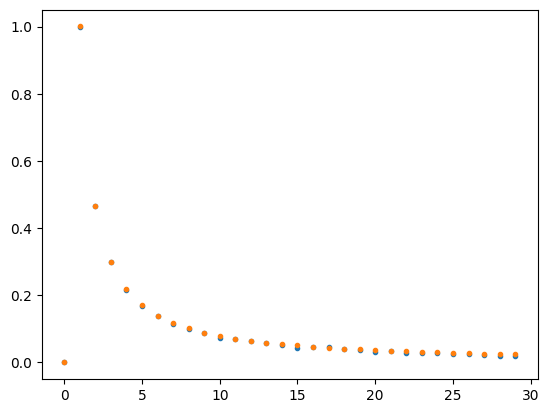

In [33]:
from matplotlib import pyplot as plt
#plot pred fourier coefficients and target fourier coefficients
plt.plot(np.abs(pred_fourier_time[:sum_terms_target]), '.', label="pred")
plt.plot(np.abs(target_fourier_coeff[:sum_terms_target]), '.', label="true")
# plt.plot(np.abs(pred_fourier_time) - np.abs(target_fourier_coeff), '.', label="error")

In [34]:
# freq-loc signals 

freq_max = sum_terms_target
freq_loc_inputs_decay = .1  

alpha_sup = (2*target_decay_rate -1 - kernel_decay_rate) / 2*(kernel_decay_rate + freq_loc_inputs_decay)

print("alpha_sup" , alpha_sup)
alpha_freq_loc = .8 * alpha_sup

alpha_sup 0.06000000000000001


In [35]:
#run inference for frequency-localized signal
error_sampmean_freq_loc, error_sampstd_freq_loc, error_logmean_freq_loc, error_logstd_freq_loc = run_inference_error_frequency_localized(
    num_samples=num_samples,
    num_experiments=num_experiments,
    time_array=time_array,
    time_span=time_span,
    kernel_coeff= kernel_coeff_abs,
    target_fourier_coeff=target_fourier_coeff,
    noise=noise,
    alpha=alpha_freq_loc,
    series_truncation=sum_terms_target,
    freq_loc_inputs_decay=freq_loc_inputs_decay,
    freq_loc_max=freq_max
)

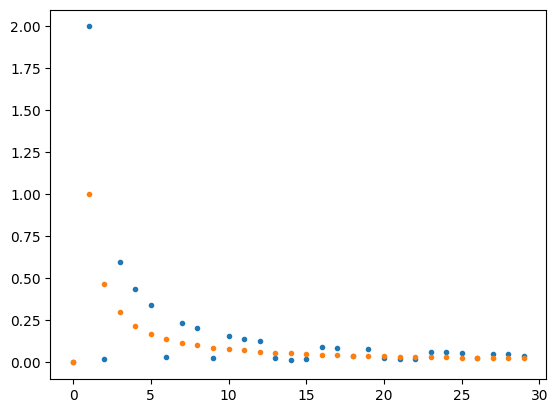

In [36]:
from matplotlib import pyplot as plt
plt.plot(np.abs(pred_fourier_freq[:sum_terms_target]), '.', label="pred")
plt.plot(np.abs(target_fourier_coeff[:sum_terms_target]), '.', label="true")
# plt.plot(np.abs(pred_fourier_freq) - np.abs(target_fourier_coeff), '.', label="error")

In [37]:
# plot_error_with_std(num_samples, error_sampmean_freq_loc, error_sampstd_freq_loc)